~<_RetentiveGuard: Unmasking LLM-Generated Essays_>~ ~<_RetentiveGuard: Unmasking LLM-Generated Essays_>~ ~<_RetentiveGuard: Unmasking LLM-Generated Essays_>~

# RETENTIVEGUARD: UNMASKING LLM-GENERATED ESSAYS

~<_RetentiveGuard: Unmasking LLM-Generated Essays_>~ ~<_RetentiveGuard: Unmasking LLM-Generated Essays_>~ ~<_RetentiveGuard: Unmasking LLM-Generated Essays_>~

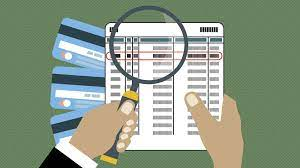

---
## 1. DATA AQUISITION 
---

---
### 1.1 IMPORTING LIBRARIES & LOADING THE DATASET
---

- Importing the necessary libraries for data manipulation using Pandas.
- Reading a CSV file named `train_essays.csv` containing essay data.
- Selecting specific columns ('text' and 'generated') from the dataset.
- Renaming the 'generated' column to 'label' for clarity in later analysis.

In [24]:
from pandas import read_csv


train_dataset = read_csv('../input/llm-detect-ai-generated-text/train_essays.csv')[['text', 'generated']].rename(columns={'generated' : 'label'})

---
### 1.2 PREPARING DATASETS
---

- Loading datasets from various sources using the Pandas library.
- Selecting relevant columns ('text' and 'label') from all the datasets.
- Assigning labels to certain datasets to indicate their origin or nature.
- Combining and resetting the index of the datasets for consistency.
- Creating a set of curated datasets for subsequent analysis and model training.

In [25]:
curated_dataset = read_csv('../input/daigt-proper-train-dataset/train_drcat_01.csv')[['text', 'label']].reset_index(drop=True)
curated_dataset1 = read_csv('../input/daigt-proper-train-dataset/train_drcat_02.csv')[['text', 'label']].reset_index(drop=True)
curated_dataset2 = read_csv('../input/daigt-proper-train-dataset/train_drcat_03.csv')[['text', 'label']].reset_index(drop=True)
curated_dataset3 = read_csv('../input/daigt-proper-train-dataset/train_drcat_04.csv')[['text', 'label']].reset_index(drop=True)

curated_dataset4 = read_csv('../input/argugpt/machine-train.csv')[['text']].reset_index(drop=True).assign(label=1)
curated_dataset5 = read_csv('../input/argugpt/machine-test.csv')[['text']].reset_index(drop=True).assign(label=1)

curated_dataset6 = read_csv('../input/llm-generated-essays/ai_generated_train_essays.csv')[['text']].reset_index(drop=True).assign(label=1)
curated_dataset7 = read_csv('../input/llm-generated-essays/ai_generated_train_essays_gpt-4.csv')[['text']].reset_index(drop=True).assign(label=1)

curated_dataset9 = read_csv('/kaggle/input/daigt-external-dataset/daigt_external_dataset.csv')[['text']].reset_index(drop=True).assign(label=1)
curated_dataset10 = read_csv('/kaggle/input/daigt-data-llama-70b-and-falcon180b/llama_70b_v1.csv')[['generated_text']].rename(columns={'generated_text' : 'text'}).reset_index(drop=True).assign(label=1)

curated_dataset11 = read_csv('/kaggle/input/daigt-data-llama-70b-and-falcon180b/falcon_180b_v1.csv')[['generated_text']].rename(columns={'generated_text' : 'text'}).reset_index(drop=True).assign(label=1)

curated_dataset12 = read_csv('/kaggle/input/daigt-v2-train-dataset/train_v2_drcat_02.csv')[['text', 'label']].reset_index(drop=True)
curated_dataset13 = read_csv('/kaggle/input/hello-claude-1000-essays-from-anthropic/persuade15_claude_instant1.csv')[['essay_text']].rename(columns={'essay_text' : 'text'}).reset_index(drop=True).assign(label=1)
curated_dataset14 = read_csv('/kaggle/input/llm-generated-essay-using-palm-from-google-gen-ai/LLM_generated_essay_PaLM.csv')[['text', 'generated']].rename(columns={'generated' : 'label'})
curated_dataset15 = read_csv('/kaggle/input/llm-7-prompt-training-dataset/train_essays_RDizzl3_seven_v2.csv')[['text', 'label']].reset_index(drop=True)
curated_dataset16 = read_csv('/kaggle/input/llm-7-prompt-training-dataset/train_essays_RDizzl3_seven_v1.csv')[['text', 'label']].reset_index(drop=True)
curated_dataset17 = read_csv('/kaggle/input/llm-7-prompt-training-dataset/train_essays_7_prompts_v2.csv')[['text', 'label']].reset_index(drop=True)
curated_dataset18 = read_csv('/kaggle/input/llm-7-prompt-training-dataset/train_essays_7_prompts.csv')[['text', 'label']].reset_index(drop=True)


---
### 1.3 COMBINING DATASETS
---

- Importing the `concat` function from the Pandas library.
- Concatenating (stacking vertically) several curated datasets.
- Creating a unified `train_dataset` that incorporates data from diverse origins..

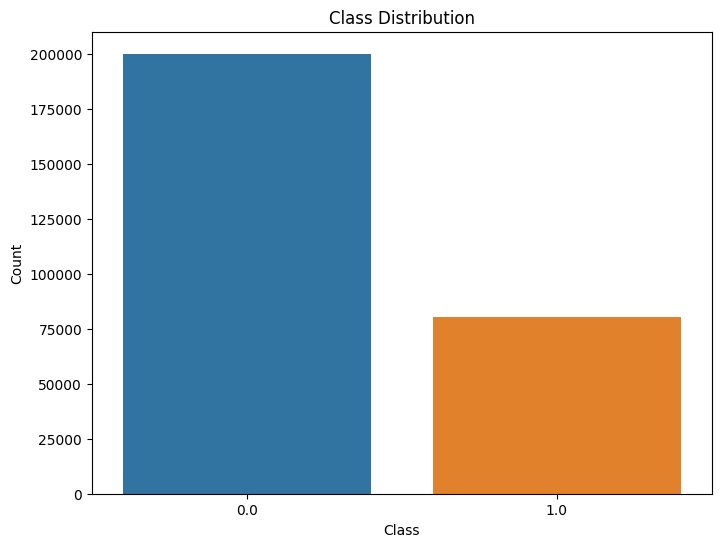

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import concat

train_dataset = concat([train_dataset, 
                        curated_dataset, 
                        curated_dataset1,
                        curated_dataset2,
                        curated_dataset3,
                        curated_dataset4, 
                        curated_dataset5, 
                        curated_dataset6, 
                        curated_dataset7, 
                        curated_dataset9, 
                        curated_dataset10, 
                        curated_dataset11,
                        curated_dataset12, 
                        curated_dataset13, 
                        curated_dataset14,
                        curated_dataset15,
                        curated_dataset16,
                        curated_dataset17, 
                        curated_dataset18])


plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=train_dataset)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

---
## 2. PREPROCESSING DATA
---

---
### 2.1 CLEANING
---

- Accessing the 'text' column in the `train_dataset` DataFrame.
- Using the `.str.replace('\n', ' ')` method to replace newline characters (`'\n'`) with spaces.
- To ensure uniformity and consistency in the text data.

In [27]:
train_dataset.text = train_dataset.text.str.replace('\n', ' ')

---
### 2.2 LOOKING AT THE DATASET
---

In [28]:
train_dataset.head()

,text,label
0,Cars. Cars have been around since they became ...,0.0
1,Transportation is a large necessity in most co...,0.0
2,"""America's love affair with it's vehicles seem...",0.0
3,How often do you ride in a car? Do you drive a...,0.0
4,Cars are a wonderful thing. They are perhaps o...,0.0


---
### 2.3 CHECKING DITRITBUTION OF LABELS
---

---
- Using the Pandas `value_counts()` method on the 'label' column.
- This method counts the occurrences of each unique label in the dataset.
- The output provides a summary, indicating how many instances belong to each unique label.
- Useful for understanding the balance or imbalance in the dataset and for making informed decisions during model training.
---

In [29]:
train_dataset.label.value_counts()

label
0.0    200039
1.0     80432
Name: count, dtype: int64

---
###  2.4 VECTORIZING TEXTUAL DATA
---

---
- Importing the `TextVectorization` layer from TensorFlow's Keras library.
- Initializing a `TextVectorization` object named `tokenizer`.
- Setting parameters for the tokenizer:
      - `output_mode='int'`: Specifies that the output of the tokenizer will be integer-encoded.
      - `output_sequence_length=512`: Defines the fixed length of the output sequences.
      - `standardize=None`: Disabling standardization to keep the original text.
      - `ngrams=1`: Configuring unigram tokenization.
---

In [30]:
from tensorflow.keras.layers import TextVectorization

tokenizer = TextVectorization(output_mode='int', output_sequence_length=512, standardize=None, ngrams=1)

---
### 2.5 ADAPTING THE VECTORIZATION LAYER
---

---
- Using the `adapt` method of the `TextVectorization` layer.
- Passing the 'text' column of the training dataset (`train_dataset.text`) to the `adapt` method.
- The layer learns important parameters such as the vocabulary (unique tokens) and their indices during this adaptation process.
- Adapting the tokenizer to the training data ensures consistency in tokenization and vectorization when the model is later applied to new, unseen data.
---

In [31]:
tokenizer.adapt(train_dataset.text)

---
## 3. MODEL CONFIGURATION
---

---
### 3.1 DETERMINING SIZE OF VOCABULARY LEARNED
---

- Using the `get_vocabulary()` method to retrieve the vocabulary learned by the tokenizer during the adaptation phase.
- Computing the length of the vocabulary by applying the `len()` function.

In [32]:
VOCAB_SIZE = len(tokenizer.get_vocabulary())
VOCAB_SIZE

203653

In [ ]:
# tokenizer(train_dataset.text[:1]).numpy().tolist()

---
### 3.2 DEFINING MODEL ARCHITECTURE FOR RETENTION MECHANISM
---

1. RecurrentRetention Layer (RecurrentRetention):
  - Implements a recurrent retention mechanism using three feedforward layers for Query (Q), Key (K), and Value (V).
  - Parameters include input_size, hidden_size, gamma, and others.
  - Applies a retention operation in the call method, producing an output and updated state.
  

2. FeedForward Layer (FeedForward):
  - A simple feedforward layer used in the retention mechanism.
  - Parameters include d_model, dff, dropout_rate, and activation.
  

3. Retention Layer (Retention):
  - Implements a retention mechanism using three dense layers for Query (Q), Key (K), and Value (V).
  - Applies decay computation, normalization tricks, and a final transformation in the call method.
  

4. MultiScaleRetention Layer (MultiScaleRetention):
  - Combines multiple retention heads, each with a different gamma value.
  - Utilizes group normalization, weighted gating, and a final linear transformation.
  

5. RetentionEncoder Layer (RetentionEncoder):
  - Integrates layer normalization, multi-scale retention, and feedforward layers.
  - Defines the forward pass (call method) for the retention encoder.


6. Initialization:
  - The RetentionEncoder is initialized with parameters like dim (dimension), hdim (head dimension), and a custom retention_layer.


In [34]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Layer, LayerNormalization, GroupNormalization, Dense, SimpleRNNCell, RNN, LSTM, Bidirectional, LSTMCell
import torch
from itertools import repeat

import tensorflow as tf
from tensorflow.keras.layers import Layer, LayerNormalization, Dense, SimpleRNNCell, RNN, LSTM, Bidirectional, LSTMCell

class RecurrentRetention(tf.compat.v1.nn.rnn_cell.RNNCell):
    def __init__(self,
                 input_size,
                 hidden_size=32,
                 gamma=0.984375,
                 trainable=True,
                 dtype=None,
                 **kwargs):
        super(RecurrentRetention, self).__init__(trainable=trainable,
                                        dtype=dtype,
                                        **kwargs)
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.r_layers = {
            'Q' : Dense(hidden_size),
            'K' : Dense(hidden_size),
            'V' : Dense(hidden_size)
        }

        self.gamma = tf.Variable(gamma, trainable=True)

    @property
    def state_size(self):
        return tf.TensorShape([self.hidden_size, self.hidden_size])

    @property
    def output_size(self):
        return self.hidden_size

    def call(self, inputs, state):
      q, k, v = [tf.cast(f(inputs), tf.float32) for f in self.r_layers.values()]
      s = self.gamma*state + tf.linalg.matmul(k, v, transpose_a=True)#tf.transpose(k, perm=[1, 0])@v
      x = tf.einsum('bi, bzk -> bk', q, s)
      return x, s


class FeedForward(tf.keras.layers.Layer):
  def __init__(self, d_model, dff, dropout_rate=0.3, activation='gelu'):
    super().__init__()
    self.seq = tf.keras.Sequential([
      tf.keras.layers.Dense(dff, activation=activation),
      tf.keras.layers.Dense(d_model),
      tf.keras.layers.Dropout(dropout_rate)
    ])

  def call(self, x):
    return self.seq(x)


class Retention(Layer):
    def __init__(self, dim=128, gamma = 0.9865, **kwargs):
        super().__init__()
        _dense_kwargs = {
                "use_bias" : True,
                "dtype" : "float32"
                }
        self._qkv_layers = [Dense(dim, **_dense_kwargs),
                            Dense(dim, **_dense_kwargs),
                            Dense(dim, **_dense_kwargs)]
        self.gamma = gamma

    def call(self, x, training=False):
        Q, K, V = [f(z) for f, z in zip(self._qkv_layers, x)]
        _, s, d = Q.shape
        #b = b if b is not None else 1
        x = Q@tf.transpose(K, perm=[0, 2, 1])
        x /= d**0.5 #Normalization Trick 1
        D = self._compute_decay(s, self.gamma)
        D /= tf.reduce_sum(D, -1)**0.5 #Normalization Trick 2
        #D = tf.stack([*repeat(D, b)])
        x = x*D
        _norm_3 = lambda xs: xs/tf.maximum(tf.abs(tf.math.reduce_sum(xs, -1)), 1)
        x = tf.vectorized_map(_norm_3, x) #Normalization Trick 3
        x = x@V
        return x

    def _compute_decay(self, seq_len, gamma = 0.96875):
        _indices = list(range(0, seq_len))
        _decay_factors = [gamma**(i-j) if i>=j else 0 for i in _indices for j in _indices]
        D = tf.reshape(tf.convert_to_tensor(_decay_factors, dtype='float32'), (seq_len, seq_len))
        #mask = tf.eye(seq_len, dtype=tf.float32)
        #mask += tf.roll(mask, shift=-1, axis=-1)+tf.roll(mask, shift=-2, axis=-1)
        return D#*mask

class MultiScaleRetention(Layer):
    def __init__(self, dim, hdim=100, retention_layer=Retention, **kwargs):
      super(MultiScaleRetention, self).__init__()
      gamma = 1 - (2 ** (-5 - torch.arange(0, dim//hdim).float()))
      gamma = gamma.numpy().tolist()
      self.dim = dim
      self.hdim = hdim
      self.heads = [retention_layer(dim=hdim, gamma=gamma[head], **kwargs) for head in range(dim // hdim)]#
      self.gn = GroupNormalization(dim)#//hdim, scale=False)
      self.wg = Sequential([
            Dense(dim, use_bias=True, activation = 'swish', **kwargs),
        ])
      self.wo = Dense(dim, use_bias=True, **kwargs)

    def call(self, q, k, v):
      W = self.wg(q)
      #q, k, v = list(map(lambda val: tf.split(val, self.dim//self.hdim, 2), x))
      x = [headi([q, k, v]) for headi in self.heads]
      x = tf.concat(x, -1)
      Y = self.gn(x)
      x = self.wo(W * Y)
      return x

class RetentionEncoder(Layer):
    def __init__(self, dim=540, hdim=100, retention_layer=Retention, **kwargs):
        super().__init__()
        self.layer_norm = LayerNormalization()
        self.msr = MultiScaleRetention(dim, hdim, retention_layer=retention_layer)
        self.layer_norm1 = LayerNormalization()
        self.ffn = FeedForward(dim, dim*4)

    def call(self, x, training=False):
      xn = self.layer_norm(x)
      msr_x = self.msr(xn, xn, xn) + x
      x = self.ffn(self.layer_norm1(msr_x)) + msr_x
      return x

---
### 3.3 INITIALIZING A MIRRORED STRATEGY
---

- Creating an instance of '*MirroredStrategy*' named '*strategy*'.
- MirroredStrategy is designed for synchronous training on multiple GPUs by replicating all of the model's variables and computations across each available GPU.

In [36]:
strategy = tf.distribute.MirroredStrategy()

---
### 3.4 CONFIGURING MODEL
---

- Wrapping model creation to utilize the previously defined MirroredStrategy for distributed training.
- Defining the input layer with a shape of (512,).
- Applying an embedding layer to convert input tokens into dense vectors.
- Utilizing a Sequential layer with RetentionEncoder repeated once for feature extraction.
- Applying a dropout layer to introduce regularization and prevent overfitting.
- Flattening the output for subsequent dense layers.
- Adding a dense layer with a sigmoid activation for binary classification.
- Creating the final Model by specifying the input and output layers.
- Compiling the model with an Adam optimizer, Binary Focal Crossentropy loss, and several evaluation metrics.

In [37]:
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Input, Embedding, Dense, Flatten, Softmax, Dropout
from itertools import repeat

with strategy.scope():
    inputs = Input((512, ))
    x = Embedding(len(tokenizer.get_vocabulary()), 32)(inputs)
    x = Sequential([*repeat(RetentionEncoder(32, 32//2), 1)])(x)#RNN(RecurrentRetention(32, 32))(x)
    z = Dropout(0.5)(x)
    x = Flatten()(x)
    x = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=inputs, outputs=x)

    model.compile(
              optimizer=tf.keras.optimizers.Adam(learning_rate=5e-4, weight_decay=0.1, clipvalue=3),
              loss=tf.keras.losses.BinaryFocalCrossentropy(apply_class_balancing=True, label_smoothing=0.1),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                      tf.keras.metrics.AUC(),
                      tf.keras.metrics.Recall(),
                      tf.keras.metrics.Precision()],
          )

---
## 4. MODEL TRAINING
---

---
### 4.1 TRAINING MODEL ACROSS MULTIPLE GPU
---

- Creating a TensorFlow dataset from the input data, tokenizing the text, and batching it with labels.
- Shuffling the dataset to introduce randomness in each epoch's training.
- Splitting the dataset into training (train_split) and validation (val_split) sets.
- Utilizing the model.fit method to train the model on the training set (train_split), validate on the validation set (val_split), and specifying the number of epochs and batch size.
- The training history is collected in the histories list.

In [ ]:
histories = []
with strategy.scope():
    ds = tf.data.Dataset.from_tensor_slices((train_dataset.text, train_dataset.label)).batch(128).map(lambda x, y: (tokenizer(x), y))
    ds = ds.shuffle(ds.cardinality())
    train_split = ds.take(int(len(ds)*0.8))
    val_split = ds.skip(int(len(ds)*0.8)).take(int(len(ds)*0.2))
    histories = model.fit(train_split, validation_data=[val_split], epochs=1, batch_size=128)

 148/1753 [=>............................] - ETA: 41:33 - loss: 0.0502 - binary_accuracy: 0.8429 - auc_1: 0.8635 - recall_1: 0.5326 - precision_1: 0.8031

---
### 4.2 READING THE DATA
---

- Reading the CSV file located at '../input/llm-detect-ai-generated-text/test_essays.csv'.

In [ ]:
test = read_csv('../input/llm-detect-ai-generated-text/test_essays.csv', sep=',')

---
## 5. MODEL INFERENCE
---

### 5.1 UTILIZING TRAINED MODEL TO MAKE PREDICTIONS

- Wrapping the prediction process in strategy.scope() to leverage the specified distributed training strategy.
- Creating a TensorFlow dataset from the test data (test.text).
- Batching and tokenizing the text data using the model's tokenizer.
- Using the model.predict method to obtain predictions for the test data.
- The resulting generated variable holds the model's predictions for further analysis or evaluation.

In [ ]:
with strategy.scope():
    generated = model.predict(tf.data.Dataset.from_tensor_slices((test.text)).batch(128).map(lambda x: tokenizer(x)))

---
## 6. POST INFERENCE PROCESSING
---

---
### 6.1 STORING THE PREDICTIONS
---

- The values in the 'generated' column are filled with the predictions obtained from the model.

In [ ]:
test['generated'] = generated

---
### 6.2 MODIFYING THE TEST DATAFRAME
---

- The columns 'prompt_id' and 'text' are dropped from the DataFrame.
- The index of the DataFrame is reset after the columns are dropped.

In [ ]:
test = test.drop(['prompt_id', 'text'], axis=1).reset_index(drop=True)

---
### 6.2 LOOKING AT THE DATASET
---

In [ ]:
test.head()

---
## 7. SUBMISSION
---

In [ ]:
test.to_csv('submission.csv', index=False)